In [242]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

In [243]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers  

print(tf.__version__)

2.15.0


In [244]:
data = pd.read_csv("medical_cost.csv")

In [245]:
data

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1334,50,male,30.970,3,no,northwest,10600.54830
1334,1335,18,female,31.920,0,no,northeast,2205.98080
1335,1336,18,female,36.850,0,no,southeast,1629.83350
1336,1337,21,female,25.800,0,no,southwest,2007.94500


## Data Preprocessing

In [246]:
data = data.drop("Id", axis=1)
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [247]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [248]:
data['region'].nunique()  # get the number of categories in categorical data

4

In [249]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [250]:
data['sex'].nunique()

2

In [251]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [252]:
data.isnull().values.any()  # checks whether there are any NaN values in the datafrane

False

In [253]:
from sklearn.preprocessing import LabelEncoder

# use label incoder for sex column
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
5,31,0,25.740,0,0,southeast,3756.62160
6,46,0,33.440,1,0,southeast,8240.58960
7,37,0,27.740,3,0,northwest,7281.50560
8,37,1,29.830,2,0,northeast,6406.41070
9,60,0,25.840,0,0,northwest,28923.13692


In [254]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

#data['region_cat'] = label_encoder.fit_transform(data['region'])
enc_df = pd.DataFrame(enc.fit_transform(data[['region']]).toarray())
enc_df.head(10)

,0,1,2,3
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
5,0.0,0.0,1.0,0.0
6,0.0,0.0,1.0,0.0
7,0.0,1.0,0.0,0.0
8,1.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0


In [255]:
enc_df.rename(columns={3:'region_southwest', 2:'region_southeast', 1:'region_northwest', 0:'region_northeast'}, inplace=True)
enc_df

,region_northeast,region_northwest,region_southeast,region_southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
1333,0.0,1.0,0.0,0.0
1334,1.0,0.0,0.0,0.0
1335,0.0,0.0,1.0,0.0
1336,0.0,0.0,0.0,1.0


In [256]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
5,31,0,25.740,0,0,southeast,3756.62160
6,46,0,33.440,1,0,southeast,8240.58960
7,37,0,27.740,3,0,northwest,7281.50560
8,37,1,29.830,2,0,northeast,6406.41070
9,60,0,25.840,0,0,northwest,28923.13692


In [257]:
data = data.drop('region', axis=1)
data

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [258]:
data = enc_df.join(data)
data

,region_northeast,region_northwest,region_southeast,region_southwest,age,sex,bmi,children,smoker,charges
0,0.0,0.0,0.0,1.0,19,0,27.900,0,1,16884.92400
1,0.0,0.0,1.0,0.0,18,1,33.770,1,0,1725.55230
2,0.0,0.0,1.0,0.0,28,1,33.000,3,0,4449.46200
3,0.0,1.0,0.0,0.0,33,1,22.705,0,0,21984.47061
4,0.0,1.0,0.0,0.0,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,0.0,1.0,0.0,0.0,50,1,30.970,3,0,10600.54830
1334,1.0,0.0,0.0,0.0,18,0,31.920,0,0,2205.98080
1335,0.0,0.0,1.0,0.0,18,0,36.850,0,0,1629.83350
1336,0.0,0.0,0.0,1.0,21,0,25.800,0,0,2007.94500


In [259]:
X, y = data.iloc[:, :-1].values, data.iloc[:, -1].values  # extract values from a column (result is a numpy array)
X.shape

(1338, 9)

In [260]:
data['age'].min()

18

In [261]:
data.head()

,region_northeast,region_northwest,region_southeast,region_southwest,age,sex,bmi,children,smoker,charges
0,0.0,0.0,0.0,1.0,19,0,27.900,0,1,16884.92400
1,0.0,0.0,1.0,0.0,18,1,33.770,1,0,1725.55230
2,0.0,0.0,1.0,0.0,28,1,33.000,3,0,4449.46200
3,0.0,1.0,0.0,0.0,33,1,22.705,0,0,21984.47061
4,0.0,1.0,0.0,0.0,32,1,28.880,0,0,3866.85520


In [262]:
data['age'].max()

64

In [263]:
import os

cwd = os.getcwd()
cwd

'c:\\Users\\utilisateur\\VSCProjects\\cv_project\\data'

In [264]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Lasso

In [265]:
from sklearn import linear_model


clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)

Lasso(alpha=0.1)

In [266]:
y_pred_lasso = clf.predict(X_test)

In [267]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


mse = mean_squared_error(y_test, y_pred_lasso)
print(f"mse: {mse}")

mae = mean_absolute_error(y_test, y_pred_lasso)
print(f"mae: {mae}")

r2 = r2_score(y_test, y_pred_lasso)
print(f"r2: {r2}")

mse: 33597179.95969158
mae: 4181.247079327996
r2: 0.783591275517302


## Linear Regression

In [268]:
from sklearn.linear_model import LinearRegression


reg = LinearRegression().fit(X_train, y_train)

In [269]:
y_pred_lr = reg.predict(X_test)

In [270]:
mse = mean_squared_error(y_test, y_pred_lr)
print(f"mse: {mse}")

mae = mean_absolute_error(y_test, y_pred_lr)
print(f"mae: {mae}")

r2 = r2_score(y_test, y_pred_lr)
print(f"r2: {r2}")

mse: 33596915.85136147
mae: 4181.194473753649
r2: 0.7835929767120723


## Support Vector Regression

In [271]:
# y = y.reshape(len(y),1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [272]:
# from sklearn.preprocessing import StandardScaler

# # feature scaling
# sc_X = StandardScaler()
# sc_y = StandardScaler()

# X_train = sc_X.fit_transform(X_train)
# y_train = sc_y.fit_transform(y_train)

In [273]:
# from sklearn.svm import SVR


# regressor = SVR(kernel = 'linear')
# regressor.fit(X_train, y_train)

In [274]:
# X_test = sc_X.transform(X_test)
# X_test.shape

In [275]:
# y_pred_svr = regressor.predict(X_test)

In [276]:
# mse = mean_squared_error(y_test, y_pred_svr)
# print(f"mse: {mse}")

# mae = mean_absolute_error(y_test, y_pred_svr)
# print(f"mae: {mae}")

# r2 = r2_score(y_test, y_pred_svr)
# print(f"r2: {r2}")

## Elastic Net

In [277]:
from sklearn.linear_model import ElasticNet


el_net = ElasticNet(random_state=42)
el_net.fit(X_train, y_train)

ElasticNet(random_state=42)

In [278]:
y_pred_el_net = el_net.predict(X_test)

In [279]:
mse = mean_squared_error(y_test, y_pred_el_net)
print(f"mse: {mse}")

mae = mean_absolute_error(y_test, y_pred_el_net)
print(f"mae: {mae}")

r2 = r2_score(y_test, y_pred_el_net)
print(f"r2: {r2}")

mse: 90217693.53227091
mae: 7419.674106361628
r2: 0.4188828941442817


## Decision Tree Regression

In [280]:
from sklearn.tree import DecisionTreeRegressor


regressor = DecisionTreeRegressor(random_state = 42, max_depth=3)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

### The Final Tree

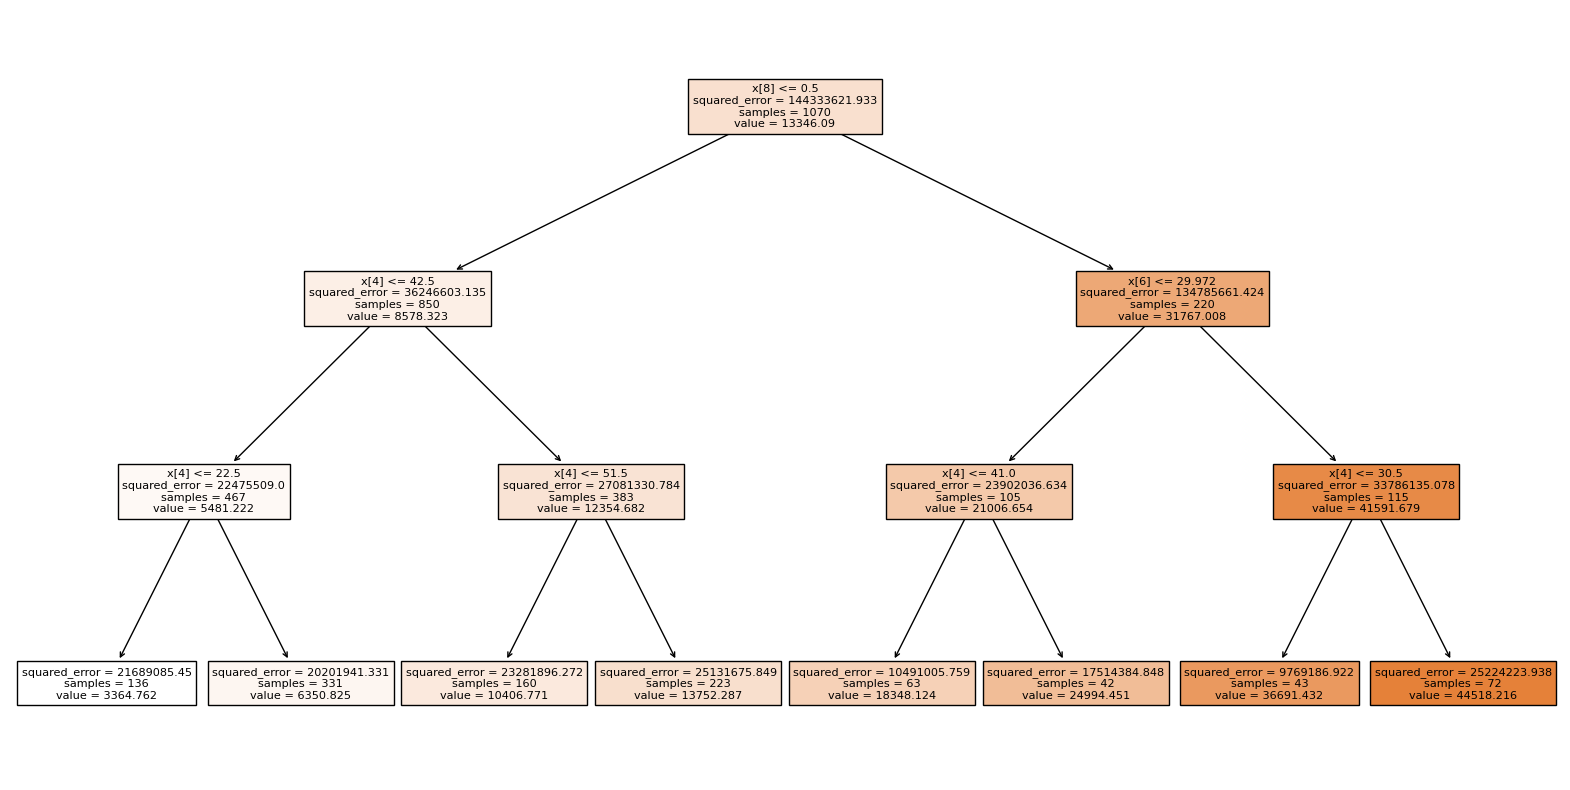

In [281]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(regressor, filled=True)
plt.show()

In [282]:
y_pred_dec_tree = regressor.predict(X_test)

In [283]:
mse = mean_squared_error(y_test, y_pred_dec_tree)
print(f"mse: {mse}")

mae = mean_absolute_error(y_test, y_pred_dec_tree)
print(f"mae: {mae}")

r2 = r2_score(y_test, y_pred_dec_tree)
print(f"r2: {r2}")

mse: 22812669.852340844
mae: 2865.6378101751257
r2: 0.8530572866320028


## Random Forest Regression (Top Scorer!)

In [284]:
from sklearn.ensemble import RandomForestRegressor


regressor = RandomForestRegressor(n_estimators = 5, random_state = 0, max_depth=5)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=5, random_state=0)

In [285]:
y_pred_random_forest = regressor.predict(X_test)

In [286]:
mse = mean_squared_error(y_test, y_pred_random_forest)
print(f"mse: {mse}")

mae = mean_absolute_error(y_test, y_pred_random_forest)
print(f"mae: {mae}")

r2 = r2_score(y_test, y_pred_random_forest)
print(f"r2: {r2}")

mse: 20011445.63187561
mae: 2594.6111083675205
r2: 0.8711007462696337


## Polynomial Regression

In [287]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

In [288]:
y_pred_pol = regressor.predict(poly_reg.transform(X_test))

In [289]:
mse = mean_squared_error(y_test, y_pred_pol)
print(f"mse: {mse}")

mae = mean_absolute_error(y_test, y_pred_pol)
print(f"mae: {mae}")

r2 = r2_score(y_test, y_pred_pol)
print(f"r2: {r2}")

mse: 36994730.56664374
mae: 3536.938611641366
r2: 0.7617067127623902


## DNN with TensorFlow

### Build Model

In [290]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [291]:
normalizer.adapt(X_train)

In [292]:
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    
    return model

In [295]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normaliza  (None, 9)                 19        
 tion)                                                           
                                                                 
 dense_18 (Dense)            (None, 64)                640       
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4884 (19.08 KB)
Trainable params: 4865 (19.00 KB)
Non-trainable params: 19 (80.00 Byte)
_________________________________________________________________


### Fit the model

In [309]:
# %%time
history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=1000)

### Visualize the training process

In [303]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

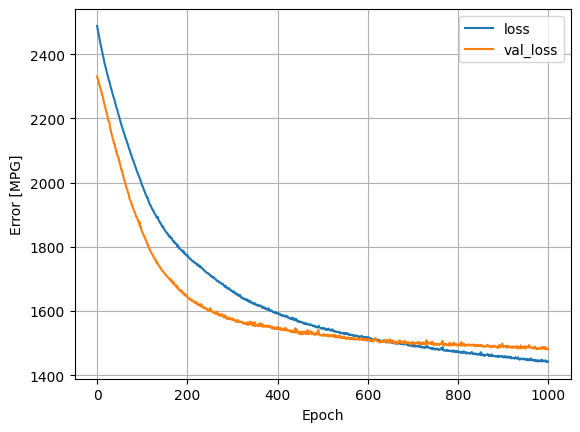

In [310]:
plot_loss(history)

### Evaluate the model

In [311]:
test_results = dnn_model.evaluate(X_test, y_test, verbose=0)

In [312]:
test_results

1322.5137939453125

### Predict

In [313]:
test_predictions = dnn_model.predict(X_test).flatten()

1/9 [==>...........................] - ETA: 0s

9/9 [==============================] - 0s 8ms/step


### Model's predictions vs. the real values

Text(0, 0.5, 'Predictions')

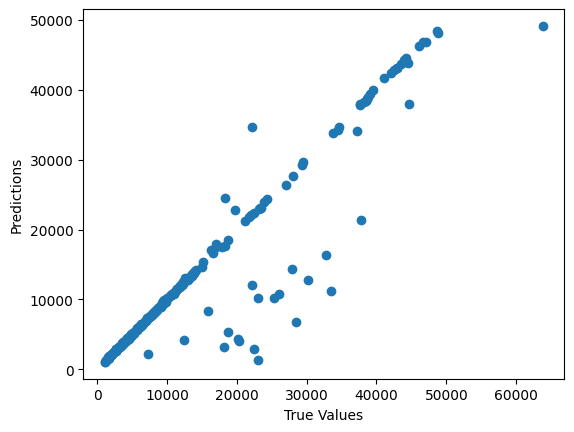

In [317]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

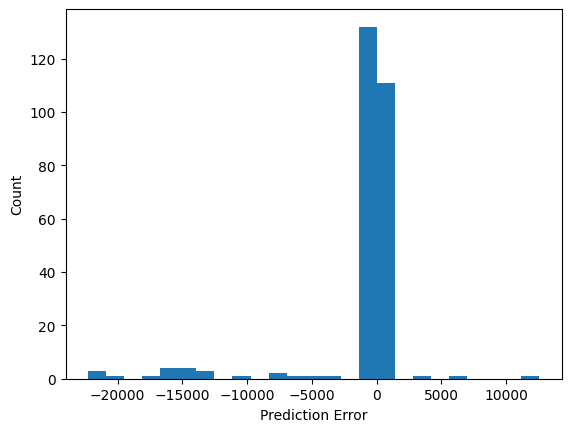

In [315]:
error = test_predictions - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')